# Monitoreo de Glaciares

### 1. Descripción y Planteamiento del Problema

El proyecto se enfoca en el estudio de los glaciares antárticos como indicadores críticos del cambio climático global. Se busca responder preguntas fundamentales sobre la evolución temporal de los glaciares y cómo estas dinámicas pueden predecir su comportamiento futuro. Los datos geoespaciales clave incluyen mediciones de elevación digital y análisis multitemporales de imágenes satelitales, que permitirán evaluar cambios en la extensión y volumen de los glaciares. Estos datos son esenciales para comprender mejor la respuesta de los glaciares antárticos al cambio climático y para desarrollar estrategias de mitigación y adaptación efectivas.

2. Obtención y procesamiento de datos espaciales (30%)

En la fase de obtención y procesamiento de datos espaciales, se accedió a datos cruciales de dos fuentes principales de la NASA: el Antartica Mass Data y el Global Mean Sea Level Data. Estos conjuntos de datos son fundamentales para estudios de cambio climático y dinámicas oceánicas globales.

Para el Antartica Mass Data, proveniente de los satélites GRACE y GRACE-FO operados por el JPL de la NASA, se capturan anomalías mensuales de masa en la Antártida desde abril de 2002 hasta abril de 2024. Los datos se encuentran en formato de texto ASCII y están georreferenciados, permitiendo un análisis detallado de cambios en la masa de hielo antártico a lo largo del tiempo.

Por otro lado, el Global Mean Sea Level Data, obtenido a través de múltiples misiones satelitales como TOPEX/Poseidon, Jason y Sentinel-6 Michael Freilich, proporciona mediciones del nivel medio global del mar cada 10 días desde septiembre de 1992 hasta enero de 2024. Estos datos, también en formato ASCII y georreferenciados, son esenciales para monitorear tendencias globales en el nivel del mar, clave para la evaluación de la vulnerabilidad costera y el impacto del cambio climático.

In [50]:
import pandas as pd
from datetime import datetime, timedelta
# Ruta del archivo
file_path = 'antarctica_mass_200204_202404.txt'

# Leer el archivo omitiendo las líneas de encabezado (HDR)
data = pd.read_csv(file_path, delim_whitespace=True, comment='H', header=None)

# Asignar nombres a las columnas
data.columns = ['Time', 'Mass Anomaly (Gt)', 'Uncertainty (Gt)']

# Mostrar las primeras filas del DataFrame
print(data.head())


      Time  Mass Anomaly (Gt)  Uncertainty (Gt)
0  2002.29               0.00            178.90
1  2002.35               0.94            102.47
2  2002.62             -54.04             83.09
3  2002.71              70.34             97.19
4  2002.79              84.67             61.82


In [51]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Leer el archivo GMSL
file_path_gmsl = 'sea.txt'
data_gmsl = pd.read_csv(file_path_gmsl, delim_whitespace=True, comment='H', header=None,
                        names=['altimeter_type', 'merged_file_cycle', 'year_fraction', 'num_observations', 
                               'num_weighted_observations', 'gmsl_no_gia', 'std_no_gia', 'smoothed_no_gia',
                               'gmsl_gia', 'std_gia', 'smoothed_gia', 'smoothed_gia_no_signals', 'smoothed_no_gia_no_signals'])

# Filtrar columnas relevantes
data_gmsl = data_gmsl[['year_fraction', 'smoothed_gia_no_signals']]
data_gmsl.columns = ['Date', 'GMSL']

# Convertir de año fraccionado a datetime
def decimal_year_to_datetime(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    start_of_year = datetime(year, 1, 1)
    days_in_year = (datetime(year + 1, 1, 1) - start_of_year).days
    return start_of_year + timedelta(days=remainder * days_in_year)

data_gmsl['Date'] = data_gmsl['Date'].apply(decimal_year_to_datetime)

# Mostrar las primeras filas del DataFrame
print(data_gmsl.head())



                        Date   GMSL
0 1993-01-05 04:58:03.936000 -37.64
1 1993-01-15 02:56:30.912003 -38.53
2 1993-01-25 00:54:57.887998 -38.16
3 1993-02-03 22:53:56.399997 -38.12
4 1993-02-13 20:52:23.375999 -36.96


### 3.y 4.  Análisis, Modelamiento, y Visualizacion de Datos

La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente $Y$ y una o más variables independientes $X$. En su forma más simple, la regresión lineal busca encontrar la línea recta que mejor se ajusta a los datos observados, minimizando la suma de los cuadrados de las diferencias entre los valores predichos y los valores reales.

#### Fórmula de Regresión Lineal Simple

Para un modelo de regresión lineal simple con una variable independiente $X$ y una variable dependiente $Y$, la ecuación de regresión lineal es:

$$ Y = \beta_0 + \beta_1 X + \epsilon $$

- $\beta_0$ es el intercepto o término constante.
- $\beta_1$ es la pendiente que indica cuánto cambia $Y$ por cada unidad de cambio en $X$.
- $\epsilon$ es el término de error, que representa la variabilidad no explicada por el modelo.



In [28]:
# Función para convertir el formato decimal a datetime
def decimal_year_to_datetime(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    start_of_year = datetime(year, 1, 1)
    next_year = datetime(year + 1, 1, 1)
    return start_of_year + timedelta(days=remainder * (next_year - start_of_year).days)

# Aplicar la conversión a la columna 'Time'
data['Date'] = data['Time'].apply(decimal_year_to_datetime)

# Reordenar las columnas para tener 'Date' al inicio
data = data[['Date', 'Time', 'Mass Anomaly (Gt)', 'Uncertainty (Gt)']]

# Mostrar las primeras filas del DataFrame procesado
print(data.head())



                        Date     Time  Mass Anomaly (Gt)  Uncertainty (Gt)
0 2002-04-16 20:23:59.999999  2002.29               0.00            178.90
1 2002-05-08 17:59:59.999997  2002.35               0.94            102.47
2 2002-08-15 07:11:59.999997  2002.62             -54.04             83.09
3 2002-09-17 03:36:00.000001  2002.71              70.34             97.19
4 2002-10-16 08:23:59.999999  2002.79              84.67             61.82


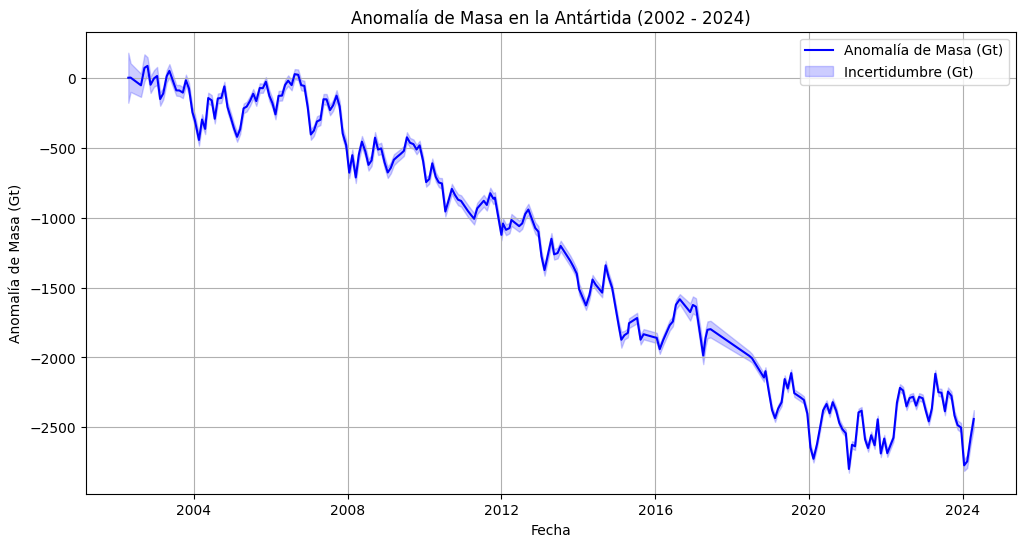

In [29]:
import matplotlib.pyplot as plt

# Plotear la anomalía de masa a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Mass Anomaly (Gt)'], label='Anomalía de Masa (Gt)', color='b')
plt.fill_between(data['Date'], 
                 data['Mass Anomaly (Gt)'] - data['Uncertainty (Gt)'], 
                 data['Mass Anomaly (Gt)'] + data['Uncertainty (Gt)'], 
                 color='b', alpha=0.2, label='Incertidumbre (Gt)')
plt.xlabel('Fecha')
plt.ylabel('Anomalía de Masa (Gt)')
plt.title('Anomalía de Masa en la Antártida (2002 - 2024)')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar los datos para el modelo
X = data[['Time']].values  # Año decimal
y = data['Mass Anomaly (Gt)'].values  # Anomalía de masa

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir la anomalía de masa para el año 2030
year_2030 = np.array([[2030]])
prediction_2030 = model.predict(year_2030)

print(f"Predicción de la anomalía de masa para el año 2030: {prediction_2030[0]:.2f} Gt")


Predicción de la anomalía de masa para el año 2030: -3544.06 Gt


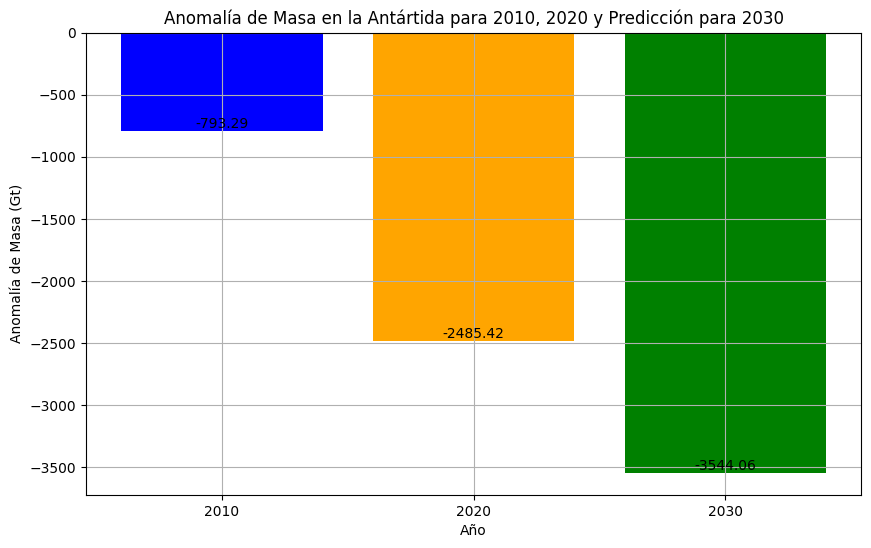

In [31]:
# Filtrar los datos para los años 2010 y 2020
data_2010 = data[(data['Date'] >= '2010-01-01') & (data['Date'] < '2011-01-01')].mean()
data_2020 = data[(data['Date'] >= '2020-01-01') & (data['Date'] < '2021-01-01')].mean()

# Obtener los valores de anomalía de masa para los años 2010 y 2020
mass_2010 = data_2010['Mass Anomaly (Gt)']
mass_2020 = data_2020['Mass Anomaly (Gt)']

# Preparar los datos para el modelo de regresión lineal
X = data[['Time']].values  # Año decimal
y = data['Mass Anomaly (Gt)'].values  # Anomalía de masa

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir la anomalía de masa para el año 2030
year_2030 = np.array([[2030]])
prediction_2030 = model.predict(year_2030)

# Datos para el gráfico
years_labels = ['2010', '2020', '2030']
mass_anomalies = [mass_2010, mass_2020, prediction_2030[0]]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(years_labels, mass_anomalies, color=['blue', 'orange', 'green'])

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Anomalía de Masa (Gt)')
plt.title('Anomalía de Masa en la Antártida para 2010, 2020 y Predicción para 2030')

# Mostrar el valor de cada barra
for i, value in enumerate(mass_anomalies):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True)
plt.show()


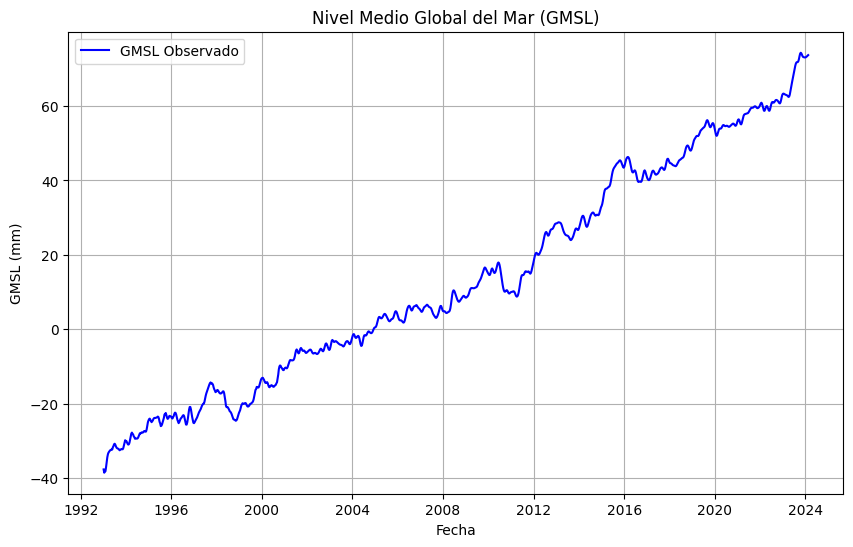

In [42]:
# Graficar el nivel del mar
plt.figure(figsize=(10, 6))
plt.plot(data_gmsl['Date'], data_gmsl['GMSL'], color='blue', label='GMSL Observado')
plt.xlabel('Fecha')
plt.ylabel('GMSL (mm)')
plt.title('Nivel Medio Global del Mar (GMSL)')
plt.legend()
plt.grid(True)
plt.show()


Predicción de GMSL para el año 2030: 83.56


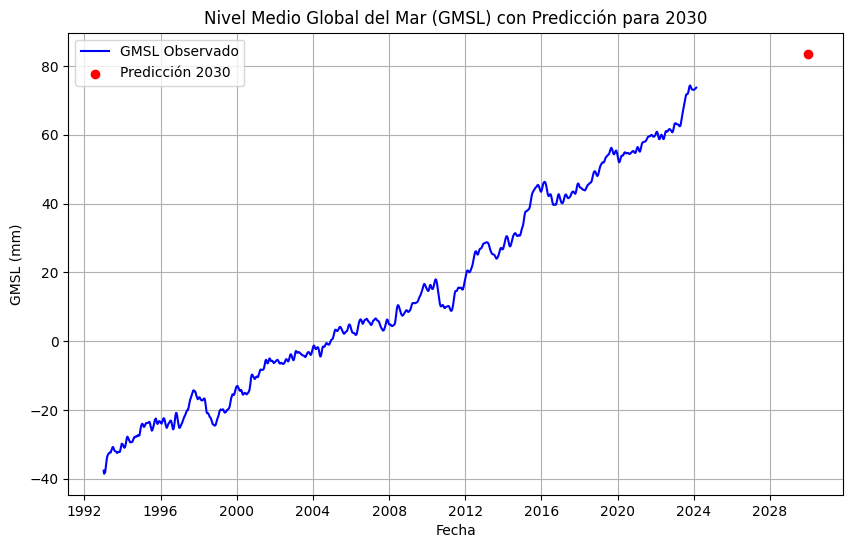

In [43]:
# Preparar los datos para el modelo de regresión lineal
data_gmsl['Time'] = data_gmsl['Date'].dt.year + (data_gmsl['Date'].dt.dayofyear - 1) / 365.25
X = data_gmsl[['Time']].values  # Año decimal
y_gmsl = data_gmsl['GMSL'].values  # GMSL

# Crear y entrenar el modelo de regresión lineal para GMSL
model_gmsl = LinearRegression()
model_gmsl.fit(X, y_gmsl)

# Predecir GMSL para el año 2030
year_2030 = np.array([[2030]])
prediction_gmsl_2030 = model_gmsl.predict(year_2030)
print(f"Predicción de GMSL para el año 2030: {prediction_gmsl_2030[0]:.2f}")

# Graficar el nivel del mar con la predicción
plt.figure(figsize=(10, 6))
plt.plot(data_gmsl['Date'], data_gmsl['GMSL'], color='blue', label='GMSL Observado')
plt.scatter(datetime(2030, 1, 1), prediction_gmsl_2030, color='red', zorder=5, label='Predicción 2030')
plt.xlabel('Fecha')
plt.ylabel('GMSL (mm)')
plt.title('Nivel Medio Global del Mar (GMSL) con Predicción para 2030')
plt.legend()
plt.grid(True)
plt.show()


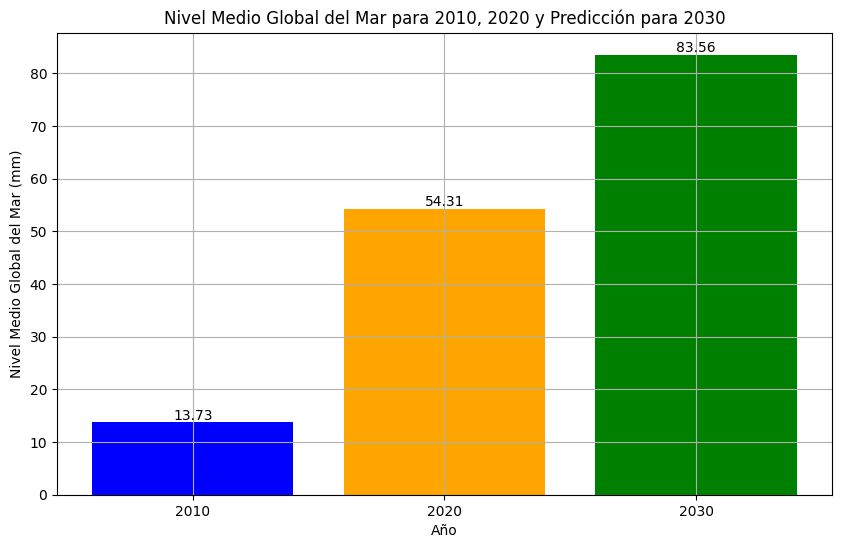

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Leer y preparar los datos
data = data_gmsl # Reemplaza con la ruta a tus datos
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = data['Date'].dt.year + (data['Date'].dt.dayofyear - 1) / 365.25

# Filtrar los datos para los años 2010 y 2020
data_2010 = data[(data['Date'] >= '2010-01-01') & (data['Date'] < '2011-01-01')].mean()
data_2020 = data[(data['Date'] >= '2020-01-01') & (data['Date'] < '2021-01-01')].mean()

# Obtener los valores de GMSL para los años 2010 y 2020
gmsl_2010 = data_2010['GMSL']
gmsl_2020 = data_2020['GMSL']

# Preparar los datos para el modelo de regresión lineal
X = data[['Time']].values  # Año decimal
y = data['GMSL'].values  # GMSL

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir el GMSL para el año 2030
year_2030 = np.array([[2030]])
prediction_2030 = model.predict(year_2030)

# Datos para el gráfico
years_labels = ['2010', '2020', '2030']
gmsl_values = [gmsl_2010, gmsl_2020, prediction_2030[0]]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(years_labels, gmsl_values, color=['blue', 'orange', 'green'])

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Nivel Medio Global del Mar (mm)')
plt.title('Nivel Medio Global del Mar para 2010, 2020 y Predicción para 2030')

# Mostrar el valor de cada barra
for i, value in enumerate(gmsl_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True)
plt.show()
